# Hybid Dark Sector Demo
In this notebook, I explore the CAMB-HDS code with some simple science applications.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import camb

In [2]:
# Standard cosmological parameters
h = 0.6756
omegabh2 = 0.022
omegach2 = 0.12
As = 2.215e-9
ns = 0.962

cases = [8, 10, 15, "LCDM"] # Each case represents a different initial value of the scalar field phi

results = []
for case in cases:
	if case == "LCDM":
		cosmo = camb.set_params(
			# Background
			H0=100*h, ombh2=omegabh2, omch2=omegach2, TCMB=2.7255,
			# Dark Energy
			dark_energy_model='fluid',
			# Neutrinos
			omnuh2=0, num_nu_massless=3.044, num_nu_massive=0,
			nu_mass_degeneracies=[0], nu_mass_numbers=[0],
			# Initial Power Spectrum
			As=As, ns=ns, 
			tau=0.0544,
			YHe=0.246, WantTransfer=True,
		)
	else:
		cosmo = camb.set_params(
			# Background
			H0=100*h, ombh2=omegabh2, omch2=omegach2, TCMB=2.7255,
			# Dark Energy
			dark_energy_model='HybridQuintessence', phi_i=case,
			potential_type=3, beta=10, phi_prime_i=0, log_shooting=False,
			# Neutrinos
			omnuh2=0, num_nu_massless=3.044, num_nu_massive=0,
			nu_mass_degeneracies=[0], nu_mass_numbers=[0],
			# Initial Power Spectrum
			As=As, ns=ns,
			tau=0.0544,
			YHe=0.246, WantTransfer=True
		)
	cosmo.NonLinear = camb.model.NonLinear_none
	results.append(camb.get_background(cosmo))

Text(0, 0.5, 'w')

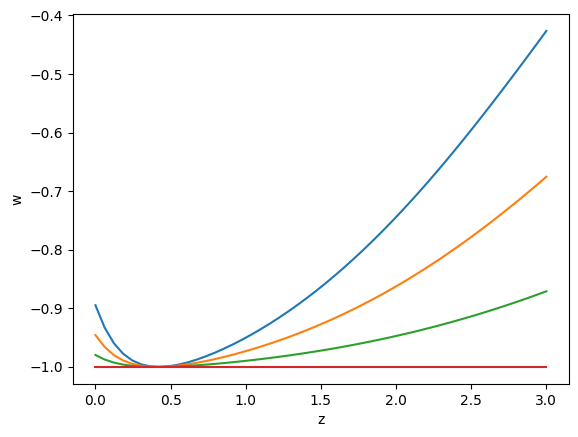

In [5]:
z = np.linspace(0, 3, 50)
a = 1/(1+z)
for result in results:
    rho, w = result.get_dark_energy_rho_w(a)
    plt.plot(z, w)
plt.xlabel("z")
plt.ylabel("w")

Text(0, 0.5, 'w')

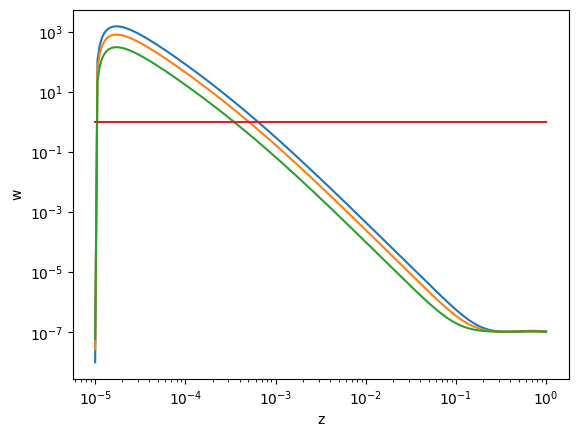

In [ ]:
a = np.logspace(-5, 0, 200)
for result in results:
    rho, w = result.get_dark_energy_rho_w(a)
    plt.loglog(a, rho)
plt.xlabel("z")
plt.ylabel("w")